# Python Libraries that are used.

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from math import sqrt

sns.set(color_codes=True)

# Reading the Dataset

In [159]:
df = pd.read_csv(r'D:\AC_Data.txt')
df.head(3)

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500


# Exploring the Dataset.

In [160]:
df.shape

(87840, 19)

In [161]:
df.describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,43708.000000,43711.000000,43713.000000,43704.000000,43716.000000,43717.000000,43679.000000,43704.000000,43654.000000,43690.000000,43670.000000,43713.000000,43719.000000,43696.000000,43715.000000,43710.000000,43714.000000,43723.000000
mean,2.379368,3.868892,2.568411,2.395158,1.421699,2.518138,2.980883,2.548711,3.184382,1.538344,2.406141,2.699639,4.279893,2.917122,4.046283,2.800050,4.218979,6.462676
std,2.276782,2.545147,1.487508,1.797529,0.767218,1.655560,1.473498,1.504482,1.522291,0.685461,1.554481,1.436087,1.847168,1.454946,2.016898,1.606239,1.125491,2.319242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.123263,1.706508,1.258299,0.970744,1.543779,2.190803,1.766230,2.294635,1.117139,1.591748,1.949729,3.260674,1.852981,3.023501,1.877626,3.752478,4.013579
50%,2.094330,3.791752,2.486992,2.308961,1.380183,2.665063,3.005071,2.608551,3.082134,1.504554,2.351361,2.727152,4.217381,2.787084,4.001279,2.673698,4.611434,7.131194
75%,3.661752,5.460892,3.441527,3.476123,1.870234,3.616988,3.897857,3.496358,4.096374,1.963707,3.254937,3.566744,5.379832,3.824467,5.260193,3.695294,4.958306,8.314639
max,11.194789,11.147141,8.430909,9.879500,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,10.654430,5.950261,11.040031


Dropping the rows with NAN values an checking the description again.We are dropping rows because every second row is a NAN row which is not useful for further data modelling. As we can see there is no significant difference in the dataset even after dropping rows.

In [162]:
df=df.dropna()
df.describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000
mean,2.394089,3.872065,2.504698,2.313283,1.466444,2.709061,2.945136,2.568989,3.149919,1.539393,2.486162,2.815970,4.313004,2.957060,4.124136,2.765703,4.255119,6.453815
std,2.309156,2.360155,1.452713,1.705811,0.748515,1.590249,1.487934,1.531968,1.534838,0.700372,1.588902,1.402622,1.872007,1.505043,2.003805,1.538245,1.078238,2.249975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.272895,1.663072,1.279719,1.008326,1.877316,2.161931,1.766606,2.273552,1.106887,1.640117,2.066214,3.273092,1.855093,3.025756,1.867401,3.773065,4.006869
50%,2.081296,3.738743,2.417197,2.255593,1.408948,2.819162,2.976191,2.622136,3.046702,1.500257,2.409043,2.824786,4.239078,2.794645,4.092966,2.685934,4.624716,7.072846
75%,3.767716,5.334570,3.351791,3.313595,1.903034,3.742868,3.852767,3.538364,4.046424,1.977836,3.362753,3.660599,5.433044,3.892646,5.409613,3.701203,4.977744,8.252815
max,11.194789,11.147141,8.430909,9.849144,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,9.789502,5.950261,11.040031


Replacing the empty values with the mean

In [163]:
list1=df.columns.tolist()
list1.remove('0')
for i in list1:
    df[i]=df[i].replace(0.0,df[i].mean())

In [164]:
df.describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000
mean,3.193686,4.275904,2.780098,2.819519,1.575998,3.135651,3.230365,2.964327,3.365145,1.623957,2.864375,3.073084,4.543582,3.078528,4.480573,3.057985,4.326730,6.609749
std,1.666874,1.960487,1.159619,1.217543,0.622586,1.091429,1.136893,1.083966,1.277278,0.594297,1.200514,1.084986,1.567396,1.375209,1.555041,1.213416,0.923444,2.007904
min,0.061684,0.042860,0.074254,0.000014,0.073418,0.064659,0.052821,0.010948,0.081387,0.071105,0.072644,0.045976,0.053765,0.057771,0.059943,0.043272,0.101446,0.209086
25%,2.394089,2.959873,2.011930,2.153089,1.129489,2.506842,2.500701,2.332265,2.485347,1.196559,2.126869,2.358540,3.476070,2.019931,3.394570,2.233054,3.887185,4.097355
50%,2.394089,3.872065,2.504698,2.313283,1.466444,2.819162,2.976191,2.622136,3.149919,1.539393,2.486162,2.824786,4.313004,2.956497,4.124136,2.765703,4.624716,7.072846
75%,3.767716,5.334570,3.351791,3.313595,1.903034,3.742868,3.852767,3.538364,4.046424,1.977836,3.362753,3.660599,5.433044,3.892646,5.409613,3.701203,4.977744,8.252815
max,11.194789,11.147141,8.430909,9.849144,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,9.789502,5.950261,11.040031


Here we came to know that we have only one object column and all other are float columns.

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34642 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       34642 non-null  object 
 1   AC 1    34642 non-null  float64
 2   AC 2    34642 non-null  float64
 3   AC 3    34642 non-null  float64
 4   AC 4    34642 non-null  float64
 5   AC 5    34642 non-null  float64
 6   AC 6    34642 non-null  float64
 7   AC 7    34642 non-null  float64
 8   AC 8    34642 non-null  float64
 9   AC 9    34642 non-null  float64
 10  AC 10   34642 non-null  float64
 11  AC 11   34642 non-null  float64
 12  AC 12   34642 non-null  float64
 13  AC 13   34642 non-null  float64
 14  AC 14   34642 non-null  float64
 15  AC 15   34642 non-null  float64
 16  AC 16   34642 non-null  float64
 17  AC 17   34642 non-null  float64
 18  AC 18   34642 non-null  float64
dtypes: float64(18), object(1)
memory usage: 5.3+ MB


# Data Visualization

Setting the datetime column as index for date range

In [166]:
df1 = df.set_index('0')
df1.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,7.518632,8.788315,2.504698,2.313283,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:02:00,7.426114,8.940615,2.504698,2.313283,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:04:00,7.052986,9.161103,2.504698,2.313283,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
2019-08-01 00:06:00,6.665446,9.065626,2.504698,2.313283,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
2019-08-01 00:08:00,6.674838,9.096130,2.504698,2.313283,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474


The below plot shows the mean unit consumption for each day during two months for all the ACs

<AxesSubplot:xlabel='0'>

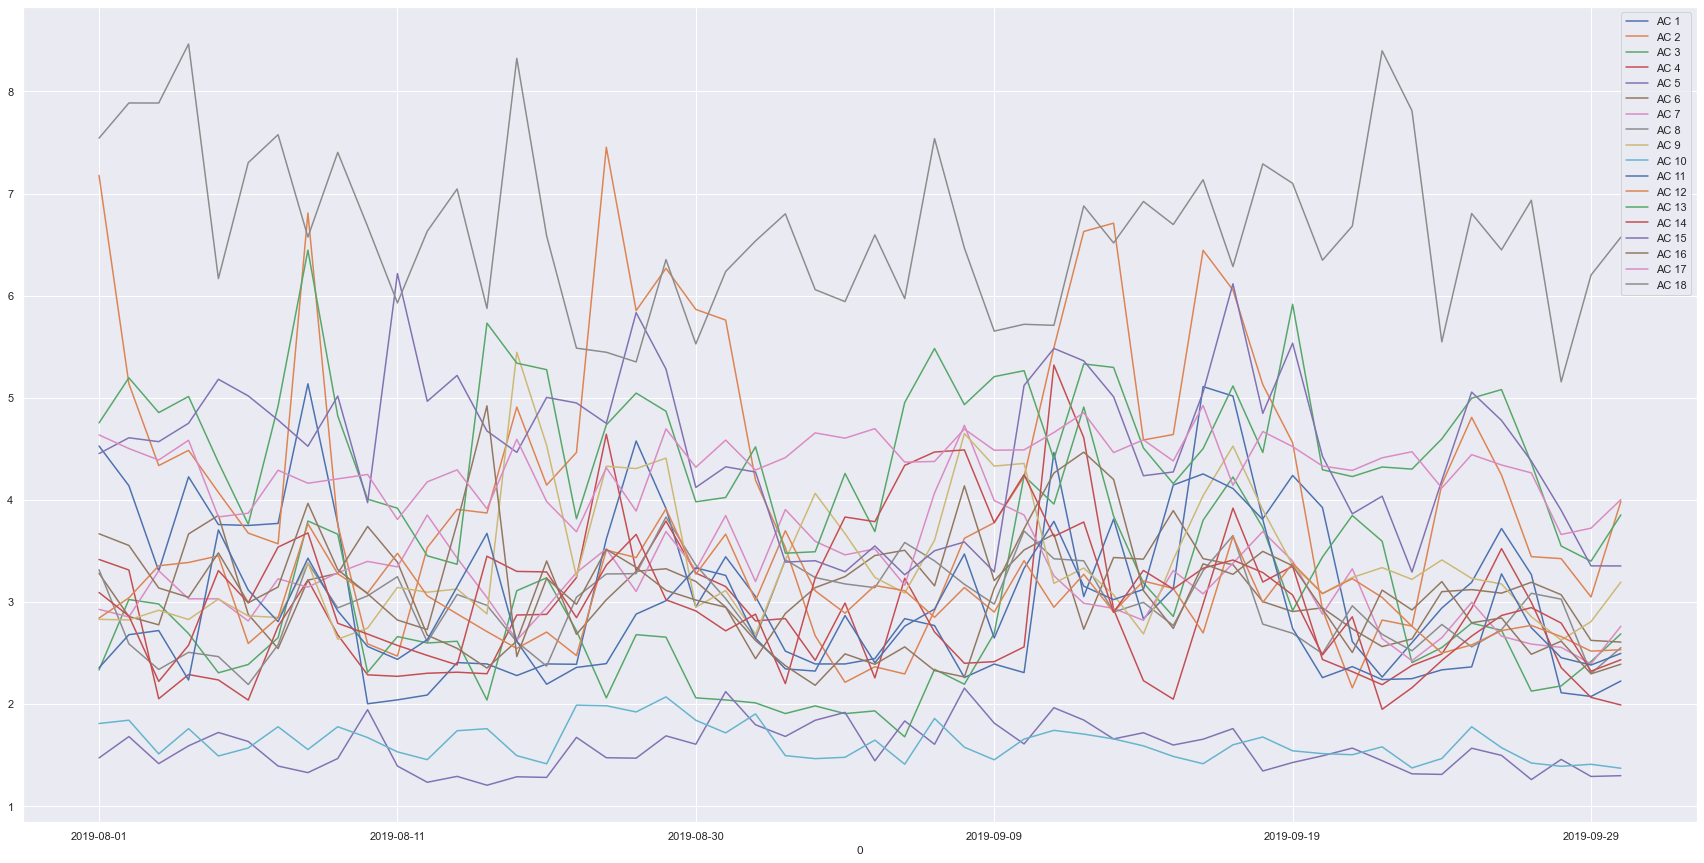

In [167]:
df['0'] = df['0'].apply(lambda x : str(x).split(' ')[0])
df.groupby('0').mean().plot(figsize=(30, 15))

Now we are plotting unit consumption against each month by different ACs. We can see the bottom line is AC 5 and the top line is AC 18. We will confirm the assumption later. 

<AxesSubplot:xlabel='Month'>

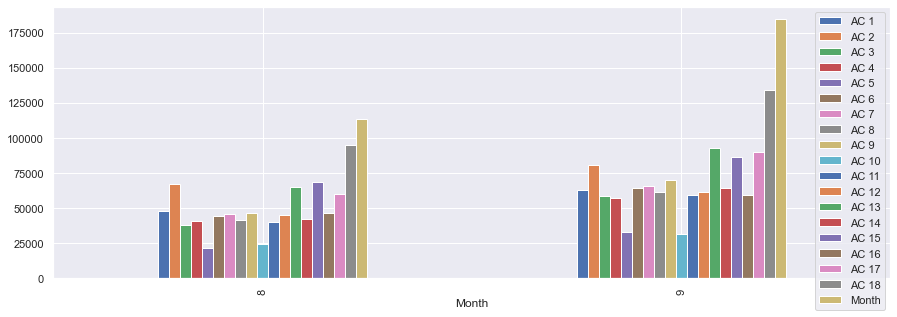

In [173]:
df1['Month'] = pd.DatetimeIndex(df['0']).month
A = df1.groupby('Month')[df1.columns].sum()
A.plot(kind = 'bar',figsize = (15,5),stacked=False)

In [174]:
df1

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Month
0,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,7.518632,8.788315,2.504698,2.313283,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,8
2019-08-01 00:02:00,7.426114,8.940615,2.504698,2.313283,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,8
2019-08-01 00:04:00,7.052986,9.161103,2.504698,2.313283,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,8
2019-08-01 00:06:00,6.665446,9.065626,2.504698,2.313283,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366,8
2019-08-01 00:08:00,6.674838,9.096130,2.504698,2.313283,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 23:51:00,2.394089,6.089533,2.322677,1.422932,1.466444,2.709061,3.729901,3.747301,3.578350,1.714157,5.146438,3.253012,2.464426,2.829701,3.693877,1.992432,3.029462,7.202612,9
2019-09-30 23:53:00,2.394089,6.046765,2.195754,1.861175,0.813454,2.709061,3.666080,3.017628,3.600397,1.547953,4.379771,3.144666,3.045807,2.693068,4.090679,1.944854,3.048858,7.348333,9
2019-09-30 23:55:00,2.394089,6.122385,2.192198,2.083315,1.046250,2.709061,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989,9


Text(0, 0.5, 'Total Units Consumed')

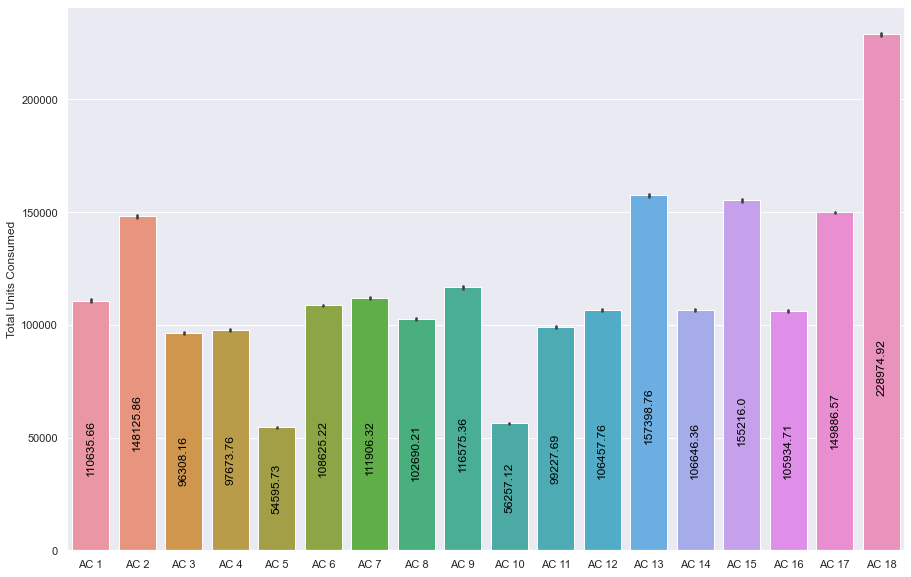

In [175]:
stats = df1.sum().tolist()
data = []
df1 = df1.drop(columns={'Month'})
for i in stats:
    data.append(float('{0:.2f}'.format(i)))
    
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=df1,estimator = sum)
def autolabel(rects):
    i=0
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.3*height,data[i],ha='center', va='bottom', rotation=90,color='black')
        i=i+1

autolabel(ax.patches)
plt.ylabel('Total Units Consumed')

From the above plot, we can see AC 5 is least used and AC 18 is the most used AC from all with unit comsumed around 54k and 228k respectively.

Let focus on these two ACs

Text(0, 0.5, 'Units Consumption')

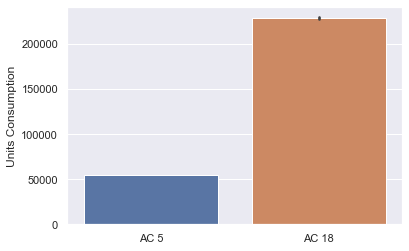

In [177]:
df_t = df1[['AC 5','AC 18']]
sns.barplot(data = df_t,estimator=sum)
plt.ylabel('Units Consumption')

Above plot showing thw units consumed by each AC during the interval,It is a big difference.

d:\py\base\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Units Consumption')

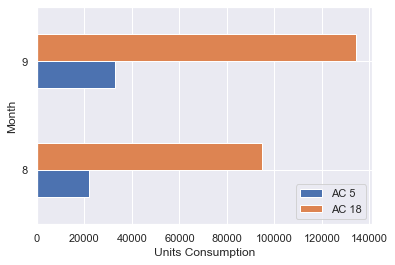

In [179]:
df1['Month'] = pd.DatetimeIndex(df['0']).month
df_t = df1[['AC 5', 'AC 18', 'Month']]
B = df_t.groupby('Month')['AC 5','AC 18'].sum()
B.plot(kind = 'barh',stacked = False)
plt.xlabel('Units Consumption')

Now we have plotted for each AC for each month consumption.

Let explore more about the trent of each how data is varying for each AC.

d:\py\base\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Units')

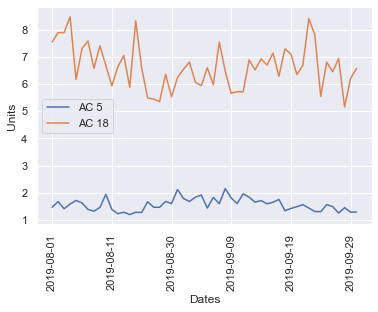

In [182]:
df_A = df[['0','AC 5','AC 18']]
df_A = df_A.reset_index(drop=True)
df_A['0'] = df_A['0'].apply(lambda x : x.split(' ')[0])
df_A.groupby('0')['AC 5','AC 18'].mean().plot()
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.ylabel('Units')

This is a very useful plot. As we can conclude from the lines that it is towards declining.As we are moving toward october which is cooler month as compare to previous months,so we can say units consumed are less consumed at the end of September.

Now lets explore a single day data.

In [183]:
df = pd.read_csv(r'D:\AC_Data.txt')
df = df.dropna()
dfA = df[['0','AC 5']]
dfB = df[['0','AC 18']]
dfA = dfA.set_index('0')
dfB = dfB.set_index('0')

As we are having every two minutes data so we are plotting for the first day for AC 5 first.

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(-100.0, 0, '2019-08-01 21:08:00'),
  Text(0.0, 0, '2019-08-01 00:00:00'),
  Text(100.0, 0, '2019-08-01 03:22:00'),
  Text(200.0, 0, '2019-08-01 06:42:00'),
  Text(300.0, 0, '2019-08-01 10:08:00'),
  Text(400.0, 0, '2019-08-01 13:32:00'),
  Text(500.0, 0, '2019-08-01 16:56:00'),
  Text(600.0, 0, '2019-08-01 20:28:00'),
  Text(700.0, 0, '2019-08-01 23:50:00'),
  Text(800.0, 0, '')])

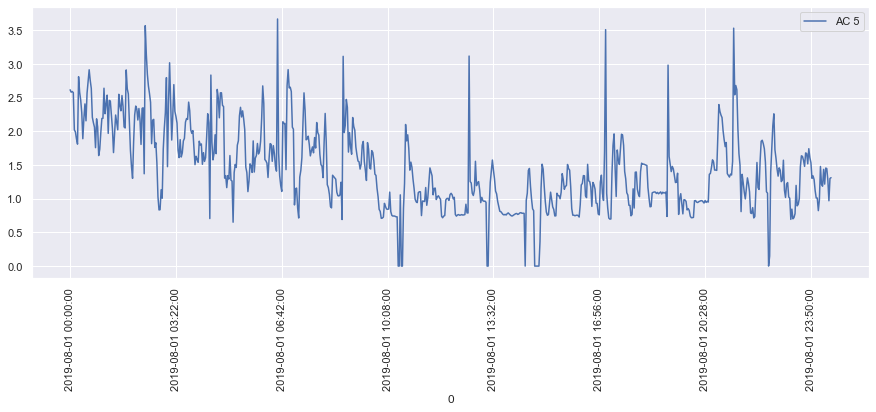

In [125]:
dfA[0:720].plot(figsize=(15,5))
plt.xticks(rotation = 90)

From this, we can observe that there is a moderate consumption of units during the nights andit get increased a bit during the morning hours and then there is a fall of consumption during the noon hours may be no one is present in the house during that hours of the day.And again we can see a rise in units during the evening till midnight.There is one more thing thatwe can conclude from this is that the AC 5 would have been on lower floors of the building as it might me more warmer in night and cooler in the morning as compare to others.

Now lets see for AC 18

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(-100.0, 0, '2019-08-01 21:08:00'),
  Text(0.0, 0, '2019-08-01 00:00:00'),
  Text(100.0, 0, '2019-08-01 03:22:00'),
  Text(200.0, 0, '2019-08-01 06:42:00'),
  Text(300.0, 0, '2019-08-01 10:08:00'),
  Text(400.0, 0, '2019-08-01 13:32:00'),
  Text(500.0, 0, '2019-08-01 16:56:00'),
  Text(600.0, 0, '2019-08-01 20:28:00'),
  Text(700.0, 0, '2019-08-01 23:50:00'),
  Text(800.0, 0, '')])

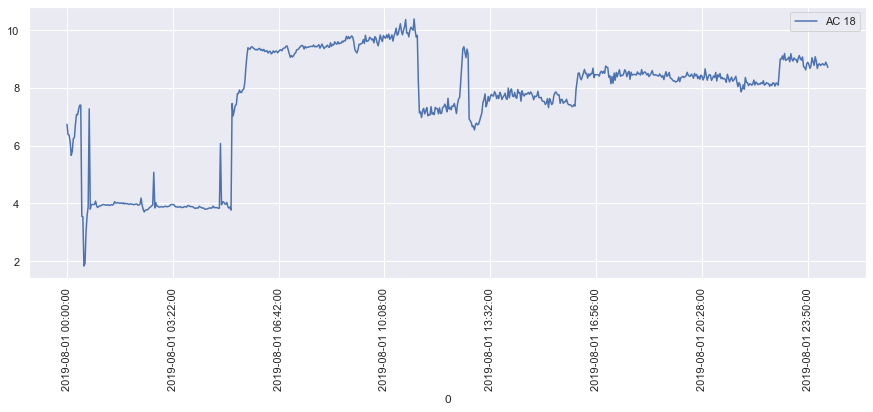

In [184]:
dfB[0:720].plot(figsize=(15,5))
plt.xticks(rotation = 90)

From this plot,we can observe that there is comparatively less consmuption of units during the night hours but there is increase during the morning hours.The AC might located on the top floor as top floor are more warmer in the daytime and it has been used constantly from the morning till midnight with almost constant rate. 

# Time Series Forecasting:

We will be focusing only on the most and the least used ACs


Loading data for AC 18

<AxesSubplot:xlabel='0'>

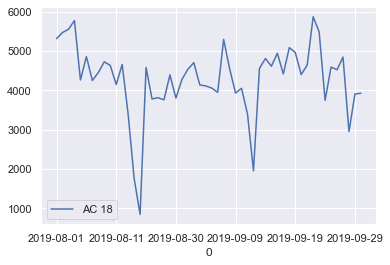

In [187]:
df['0'] = df['0'].apply(lambda x : str(x).split(' ')[0])
dfx = df.groupby('0')['AC 18'].sum()
dfx = pd.DataFrame(dfx)
dfx.plot()

To identify the nature of data, we will be using the null hypothesis.

H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

#Ho: It is non-stationary

#H1: It is stationary

We will be considering the null hypothesis that data is not stationary and the alternate hypothesis that data is stationary.

Lets perform Dickey-fuller test

In [188]:
print("Observations of Dickey-fuller test")
dftest = adfuller(dfx['AC 18'])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
   
print(dfoutput)

if dftest[1] <= 0.05:
    print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("Weak evidence against null hypothesis,indicating it is non-stationary ")

Observations of Dickey-fuller test
Test Statistic                 -4.416964
p-value                         0.000277
#lags used                      0.000000
number of observations used    51.000000
critical value (1%)            -3.565624
critical value (5%)            -2.920142
critical value (10%)           -2.598015
dtype: float64
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Original Value :4615.411991699422 Predicted Value : 4472.289128128247
Original Value :4947.087547119192 Predicted Value : 4389.532509408265
Original Value :4418.2990568848545 Predicted Value : 4558.317377268816
Original Value :5089.810139648593 Predicted Value : 4312.670983347122
Original Value :4965.886304199345 Predicted Value : 4640.860127069674
Original Value :4404.097537719787 Predicted Value : 4597.251220249564
Original Value :4644.564399414248 Predicted Value : 4330.068650799645
Original Value :5875.778730224847 Predicted Value : 4449.357402079051
Original Value :5490.615250000219 Predicted Value : 5074.518148800369
Original Value :3748.117164489779 Predicted Value : 4918.10917935701
Original Value :4594.837805053785 Predicted Value : 4051.1328148204875
Original Value :4526.7345107576175 Predicted Value : 4451.918520436841
Original Value :4849.633471313602 Predicted Value : 4422.620076928353
Original Value :2952.1675234376357 Predicted Value : 4579.588241746375
Original Value :3

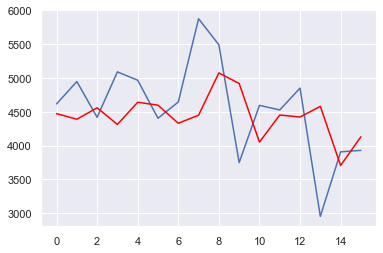

In [189]:
X = dfx['AC 18'].values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
      model = ARIMA(history, order=(1,0,0))
      model_fit = model.fit()
      output = model_fit.forecast()
      yhat = output[0]
      predictions.append(yhat)
      obs = test[t]
      history.append(obs)
      print('Original Value :' + str(obs),'Predicted Value : ' + str(yhat))


rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

We can from the RMSE plot that predicted are almost following the same pattern of values and also RMSE score is quite less.The model is good and almost predecting the similar values

Lets trained the model for AC5

<AxesSubplot:xlabel='0'>

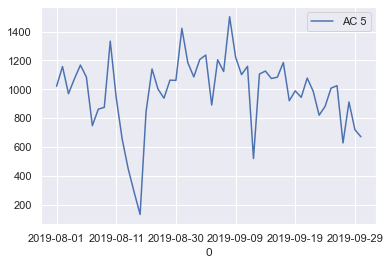

In [192]:
dfx = df.groupby('0')['AC 5'].sum()
dfx = pd.DataFrame(dfx)
dfx.plot()

To identify the nature of data, we will be using the null hypothesis.

H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

#Ho: It is non-stationary

#H1: It is stationary

We will be considering the null hypothesis that data is not stationary and the alternate hypothesis that data is stationary.

Lets perform Dickey-fuller test

In [193]:
print("Observations of Dickey-fuller test")
dftest = adfuller(dfx['AC 5'])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
   
print(dfoutput)

if dftest[1] <= 0.05:
    print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("Weak evidence against null hypothesis,indicating it is non-stationary ")


Observations of Dickey-fuller test
Test Statistic                 -3.831737
p-value                         0.002599
#lags used                      0.000000
number of observations used    51.000000
critical value (1%)            -3.565624
critical value (5%)            -2.920142
critical value (10%)           -2.598015
dtype: float64
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Original Value :1074.2372434083306 Predicted Value : 1063.8900245395898
Original Value :1083.2595235291358 Predicted Value : 1038.1018107318314
Original Value :1185.2223960418505 Predicted Value : 1043.9661754873803
Original Value :920.2212019807226 Predicted Value : 1100.0803472860816
Original Value :988.4576552734741 Predicted Value : 960.6713343387823
Original Value :943.4012133636232 Predicted Value : 995.6663006228151
Original Value :1077.2576012727332 Predicted Value : 971.7528381396779
Original Value :986.3436289062713 Predicted Value : 1041.4462920566968
Original Value :819.628723388738 Predicted Value : 994.5858839968283
Original Value :880.7090740508363 Predicted Value : 907.00310807066
Original Value :1007.4152129364251 Predicted Value : 936.9242674803413
Original Value :1024.573901428253 Predicted Value : 1002.2619096034912
Original Value :627.0996636199764 Predicted Value : 1011.3458631110676
Original Value :911.4317599334761 Predicted Value : 805.2566515140688
Original Va

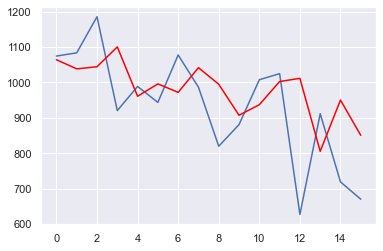

In [194]:
X = dfx['AC 5'].values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
      model = ARIMA(history, order=(1,0,0))
      model_fit = model.fit()
      output = model_fit.forecast()
      yhat = output[0]
      predictions.append(yhat)
      obs = test[t]
      history.append(obs)
      print('Original Value :' + str(obs),'Predicted Value : ' + str(yhat))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

We can from the RMSE plot that predicted are almost following the same pattern of values and also RMSE score is quite less for AC 5.The model is good and almost predecting the similar values

# Conclusion

We can see from different plots that AC 5(2% of total units) is least used while AC 18 (9% of total units)is the most used AC among all. We can observe from the trends that AC 18 might be located on upper floors of the building or if it is a family may be one is non-working or also may be children are present during the daytime or it is big family someone is always present at home.While for AC 5 it might be present at lower lower or family is smalli so they are consuming less. We have also observe that the trends are towards declining as we are approacing October which is a cooler month as compare to August and September.  